In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

<h3 style='color:skyblue'><strong>1.) Data Exploration</strong></h3>


In [64]:
data_path = 'Housing_Prices_24.csv'
house_dat = pd.read_csv(data_path)

# preview data
house_dat.head
print(house_dat)

# drop non-numeric columns
house_dat_num = house_dat.drop(columns=['Id', 'LotConfig', 'BldgType', 'Foundation', 'CentralAir', 'KitchenQual', 'PavedDrive'])

        Id  SalePrice  LotArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  FullBath  \
0        1     208500     8450          856       856       854         2   
1        2     181500     9600         1262      1262         0         2   
2        3     223500    11250          920       920       866         2   
3        4     140000     9550          756       961       756         1   
4        5     250000    14260         1145      1145      1053         2   
...    ...        ...      ...          ...       ...       ...       ...   
1455  1456     175000     7917          953       953       694         2   
1456  1457     210000    13175         1542      2073         0         2   
1457  1458     266500     9042         1152      1188      1152         2   
1458  1459     142125     9717         1078      1078         0         1   
1459  1460     147500     9937         1256      1256         0         1   

      HalfBath  BedroomAbvGr  TotRmsAbvGrd  ...  PoolArea  LotConfig  \
0  

In [65]:
house_dat.dtypes

Id                int64
SalePrice         int64
LotArea           int64
TotalBsmtSF       int64
1stFlrSF          int64
2ndFlrSF          int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageCars        int64
WoodDeckSF        int64
OpenPorchSF       int64
EnclosedPorch     int64
3SsnPorch         int64
ScreenPorch       int64
PoolArea          int64
LotConfig        object
BldgType         object
YearBuilt         int64
YearRemodAdd      int64
Foundation       object
CentralAir       object
KitchenQual      object
PavedDrive       object
YrSold            int64
dtype: object

                Id      SalePrice        LotArea  TotalBsmtSF     1stFlrSF  \
count  1460.000000    1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000  180921.195890   10516.828082  1057.429452  1162.626712   
std     421.610009   79442.502883    9981.264932   438.705324   386.587738   
min       1.000000   34900.000000    1300.000000     0.000000   334.000000   
25%     365.750000  129975.000000    7553.500000   795.750000   882.000000   
50%     730.500000  163000.000000    9478.500000   991.500000  1087.000000   
75%    1095.250000  214000.000000   11601.500000  1298.250000  1391.250000   
max    1460.000000  755000.000000  215245.000000  6110.000000  4692.000000   

          2ndFlrSF     FullBath     HalfBath  BedroomAbvGr  TotRmsAbvGrd  ...  \
count  1460.000000  1460.000000  1460.000000   1460.000000   1460.000000  ...   
mean    346.992466     1.565068     0.382877      2.866438      6.517808  ...   
std     436.528436     0.550916     0.502885      0.81

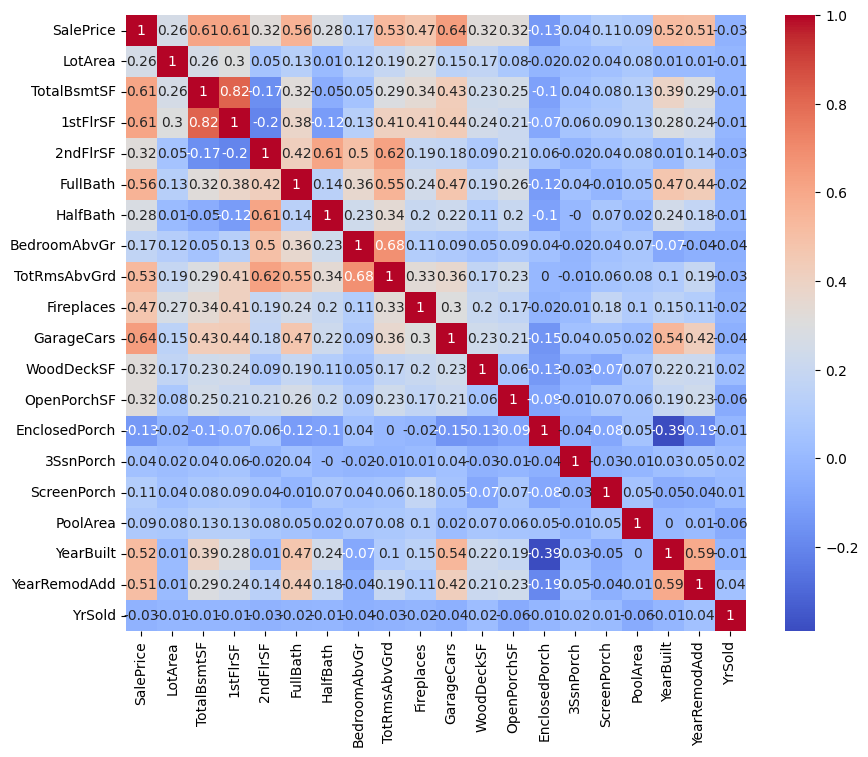

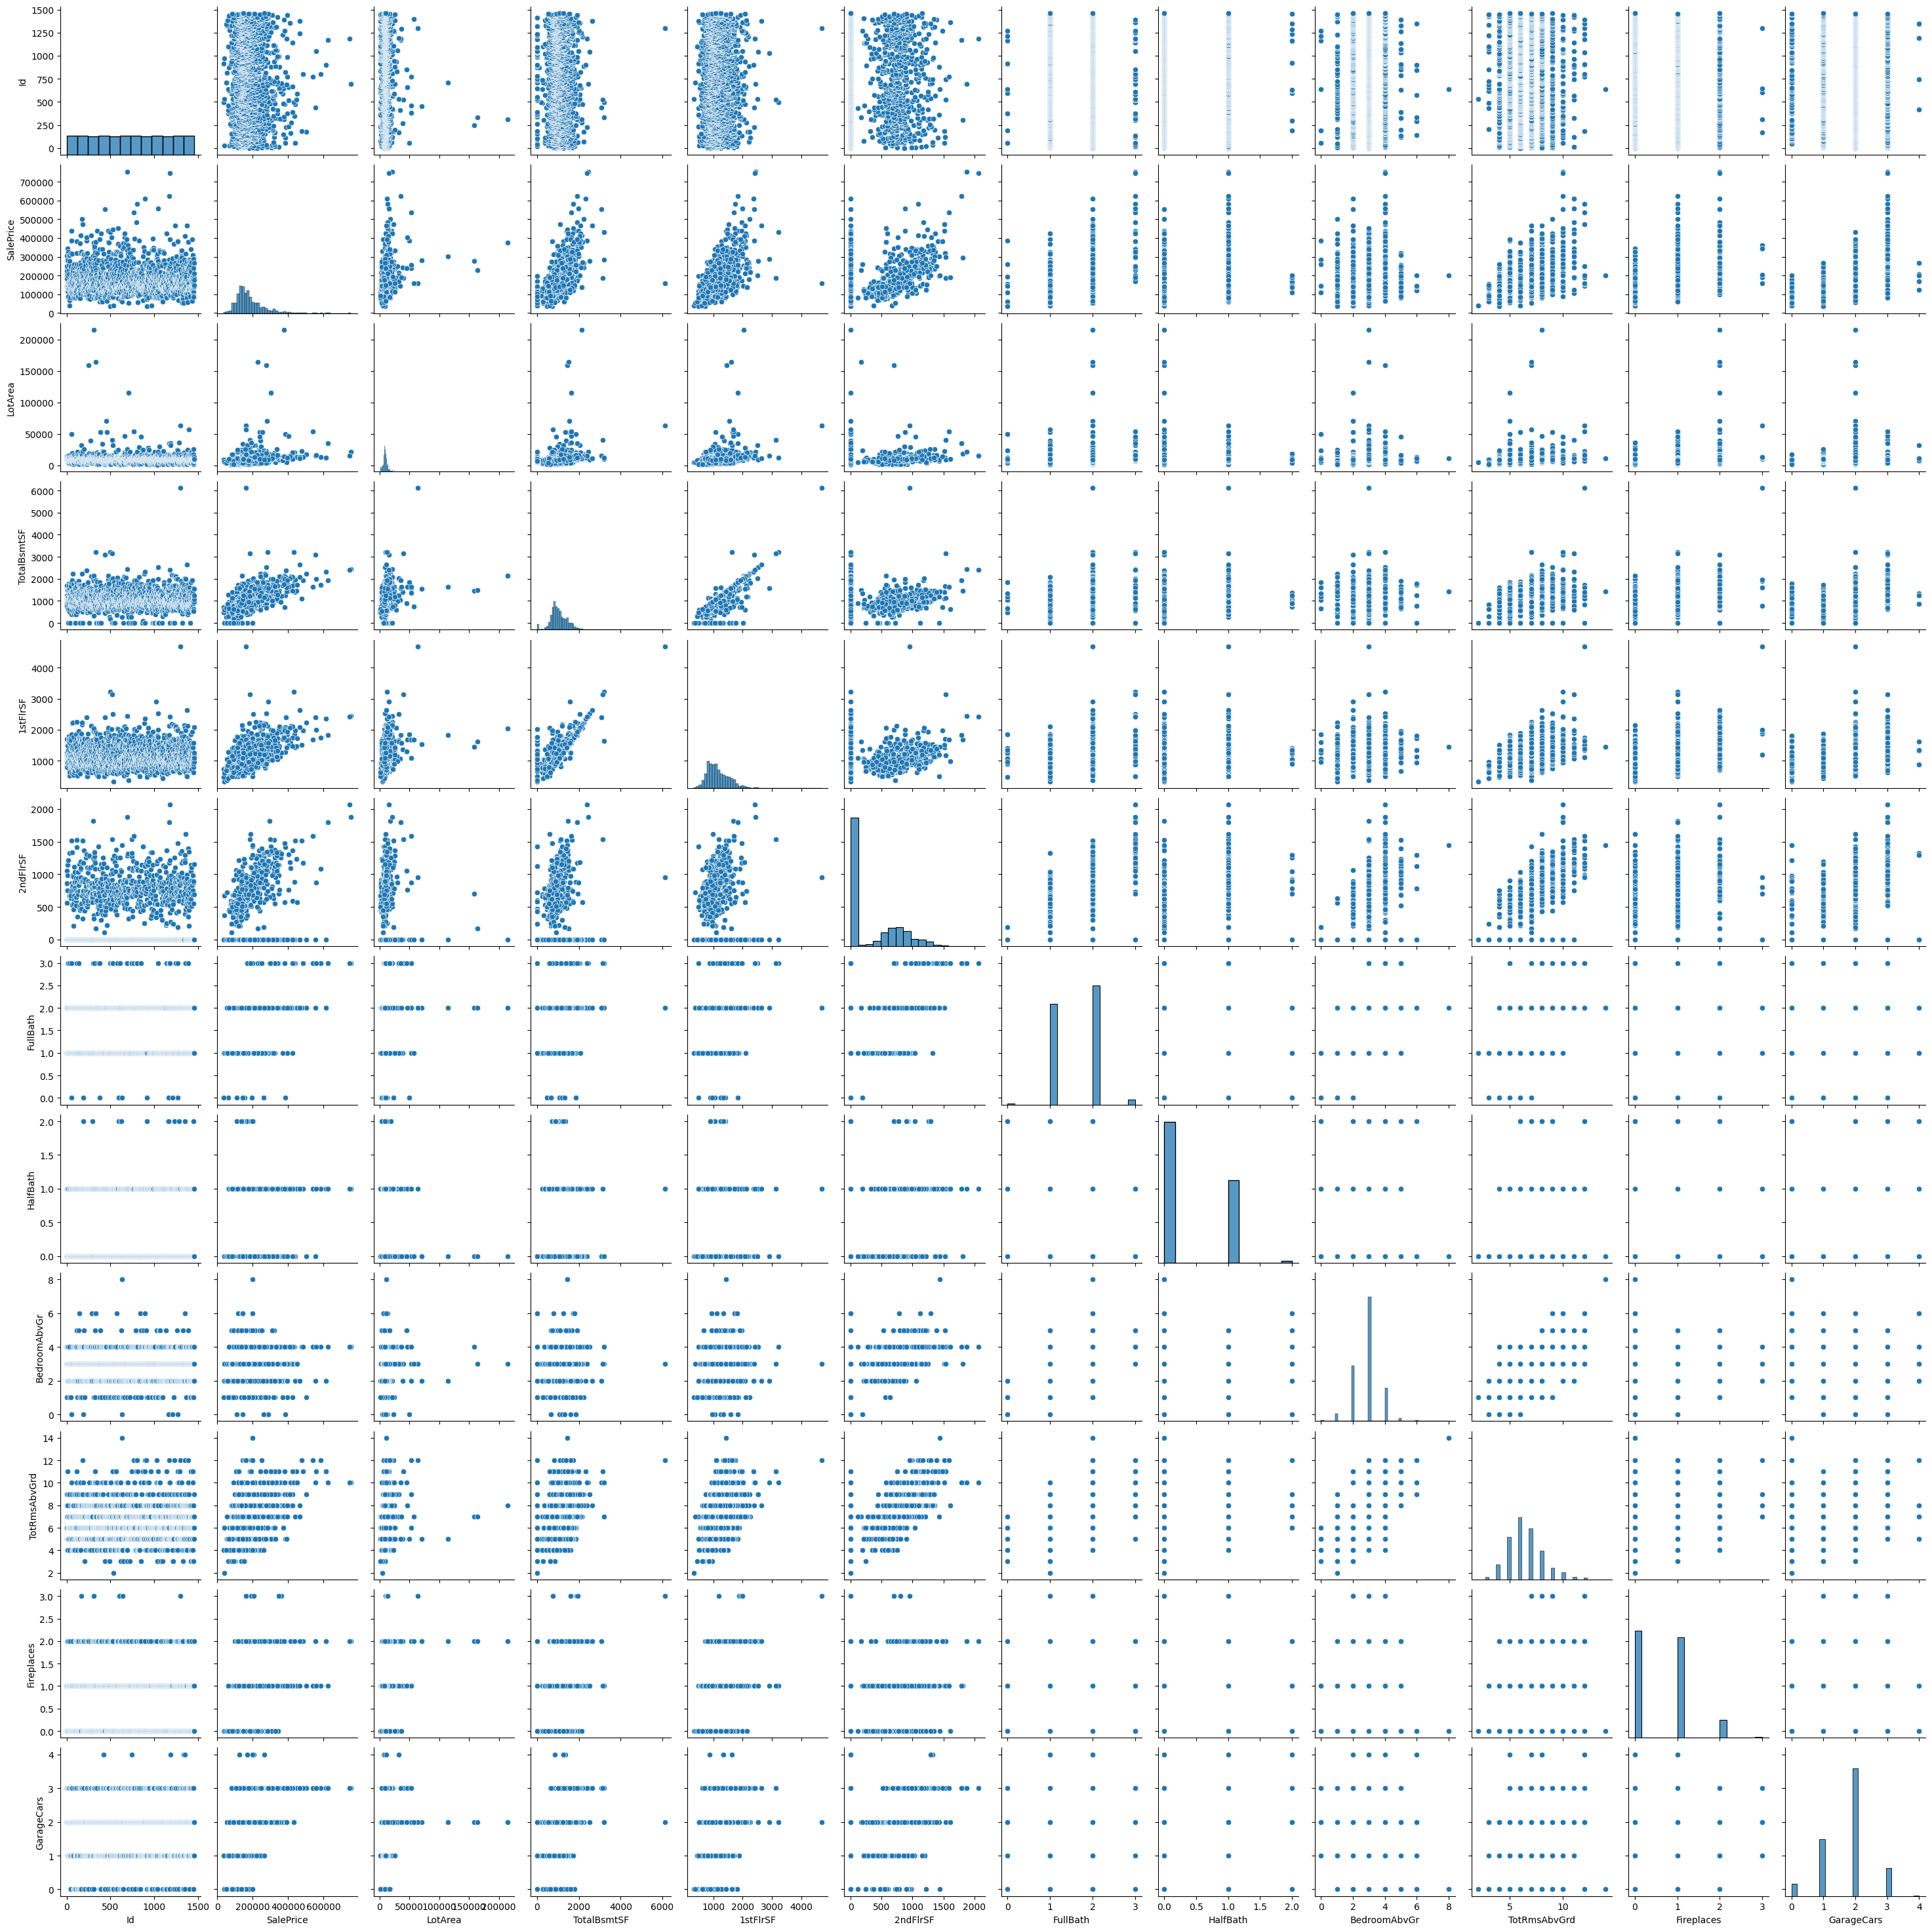

In [66]:
# Display summary statistics for numeric variables
print(house_dat.describe())

# Compute correlations
cormat = house_dat_num.corr()

# Round correlation matrix to 2 decimal places
cormat = cormat.round(2)

# Plot correlation matrix using a heatmap
plt.figure(figsize = (10,8))
sns.heatmap(cormat,annot=True, cmap = 'coolwarm')
plt.show()

# Create scatterplot matrix
sns.pairplot(house_dat.iloc[:,:12])
plt.show()

<h3 style='color:skyblue'><strong>2.) Full Regression Model</strong></h3>


In [67]:
# Fit full regression
X = house_dat_num.drop(columns=['SalePrice'])
y = house_dat['SalePrice']
X = sm.add_constant(X)
fullreg = sm.OLS(y, X).fit()

# Display regression summary
print(fullreg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     233.8
Date:                Wed, 18 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:30:49   Log-Likelihood:                -17517.
No. Observations:                1460   AIC:                         3.507e+04
Df Residuals:                    1440   BIC:                         3.518e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.638e+05   1.58e+06     -0.484

In [68]:
#check for multicollinearity
vifres = pd.DataFrame()
vifres["Variable"] = X.columns
vifres["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifres)

         Variable           VIF
0           const  2.326984e+06
1         LotArea  1.171122e+00
2     TotalBsmtSF  3.477652e+00
3        1stFlrSF  5.593260e+00
4        2ndFlrSF  4.831324e+00
5        FullBath  2.639427e+00
6        HalfBath  2.135653e+00
7    BedroomAbvGr  2.129504e+00
8    TotRmsAbvGrd  4.351695e+00
9      Fireplaces  1.455265e+00
10     GarageCars  1.854001e+00
11     WoodDeckSF  1.169583e+00
12    OpenPorchSF  1.191485e+00
13  EnclosedPorch  1.241801e+00
14      3SsnPorch  1.014567e+00
15    ScreenPorch  1.093683e+00
16       PoolArea  1.062237e+00
17      YearBuilt  2.865609e+00
18   YearRemodAdd  1.740170e+00
19         YrSold  1.015287e+00


<h3 style='color:skyblue'><strong>3.) Stepwise Variable Selection</strong></h3>


In [69]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS

    Arguments:
        X - pandas.DataFrame of numeric features
        y - vector, series of the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions

    Returns: list of selected features

    Example Call: stepwise_selection(X, y)
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval:.4f}')
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval:.4f}')
        if not changed:
           break
    return included


In [70]:
selected_features  = stepwise_selection(X, y)
print('resulting features:')
print(selected_features)

Add  const with p-value 0.0000
Add  GarageCars with p-value 0.0000
Add  TotalBsmtSF with p-value 0.0000
Add  2ndFlrSF with p-value 0.0000
Add  YearRemodAdd with p-value 0.0000
Add  1stFlrSF with p-value 0.0000
Add  YearBuilt with p-value 0.0000
Add  Fireplaces with p-value 0.0000
Add  BedroomAbvGr with p-value 0.0000
Add  WoodDeckSF with p-value 0.0004
Add  ScreenPorch with p-value 0.0009
Add  TotRmsAbvGrd with p-value 0.0014
Add  LotArea with p-value 0.0011
resulting features:
['const', 'GarageCars', 'TotalBsmtSF', '2ndFlrSF', 'YearRemodAdd', '1stFlrSF', 'YearBuilt', 'Fireplaces', 'BedroomAbvGr', 'WoodDeckSF', 'ScreenPorch', 'TotRmsAbvGrd', 'LotArea']


<h3 style='color:skyblue'><strong>4.) Stepwise Model</strong></h3>


In [71]:
# Fit stepwise regression
X = house_dat_num[['GarageCars', 'TotalBsmtSF', '2ndFlrSF', 'YearRemodAdd', '1stFlrSF', 'YearBuilt', 'Fireplaces', 'BedroomAbvGr', 'WoodDeckSF', 'ScreenPorch', 'TotRmsAbvGrd', 'LotArea']]
X = sm.add_constant(X)
stepreg = sm.OLS(y, X).fit()

# Display regression summary
print(stepreg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     369.2
Date:                Wed, 18 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:30:50   Log-Likelihood:                -17521.
No. Observations:                1460   AIC:                         3.507e+04
Df Residuals:                    1447   BIC:                         3.514e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.811e+06    1.2e+05    -15.130   

In [72]:
#check for multicollinearity
vifresstep = pd.DataFrame()
vifresstep["Variable"] = X.columns
vifresstep["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifresstep)

        Variable           VIF
0          const  13353.593970
1     GarageCars      1.835400
2    TotalBsmtSF      3.390095
3       2ndFlrSF      3.153687
4   YearRemodAdd      1.685953
5       1stFlrSF      5.147880
6      YearBuilt      2.016720
7     Fireplaces      1.439849
8   BedroomAbvGr      2.092256
9     WoodDeckSF      1.148369
10   ScreenPorch      1.062585
11  TotRmsAbvGrd      4.283360
12       LotArea      1.168127


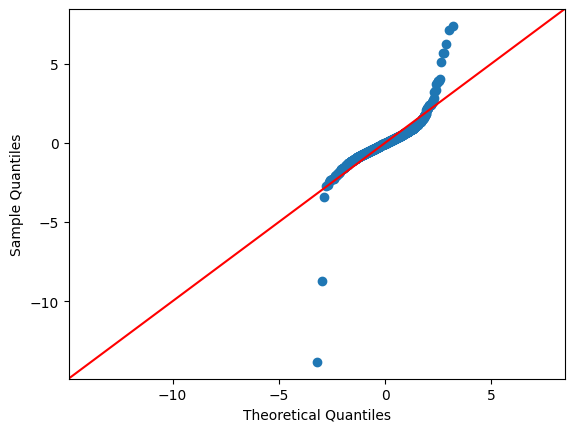

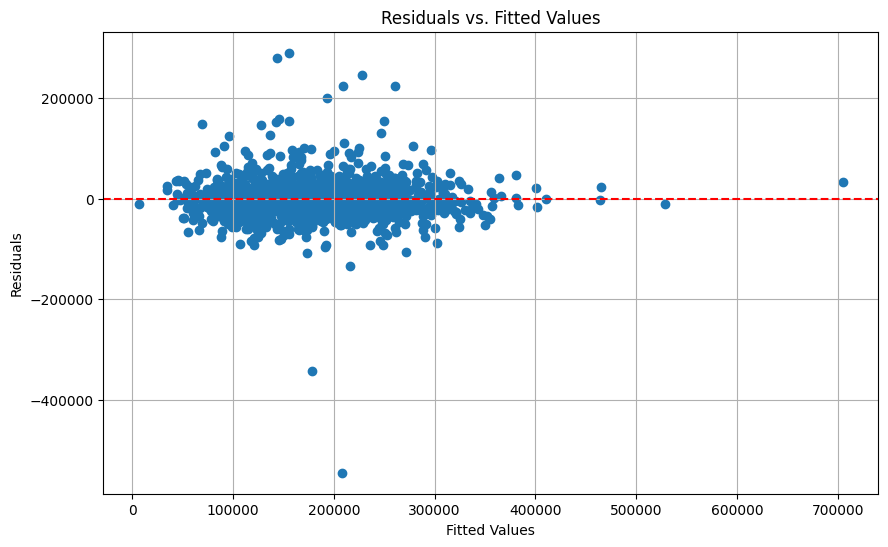

In [73]:
# Calculate residuals
residuals = stepreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals,fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(stepreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

<h3 style='color:skyblue'><strong>5.) Log Model</strong></h3>


In [74]:
# log transformed regression
X = house_dat_num[['GarageCars', 'TotalBsmtSF', '2ndFlrSF', 'YearRemodAdd', '1stFlrSF', 'YearBuilt', 'Fireplaces', 'BedroomAbvGr', 'WoodDeckSF', 'ScreenPorch', 'TotRmsAbvGrd', 'LotArea']]
X = sm.add_constant(X)
logy = np.log(y)
logreg = sm.OLS(logy, X).fit()

# Display regression summary
print(logreg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     497.5
Date:                Wed, 18 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:30:50   Log-Likelihood:                 461.69
No. Observations:                1460   AIC:                            -897.4
Df Residuals:                    1447   BIC:                            -828.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.3371      0.536     -2.496   

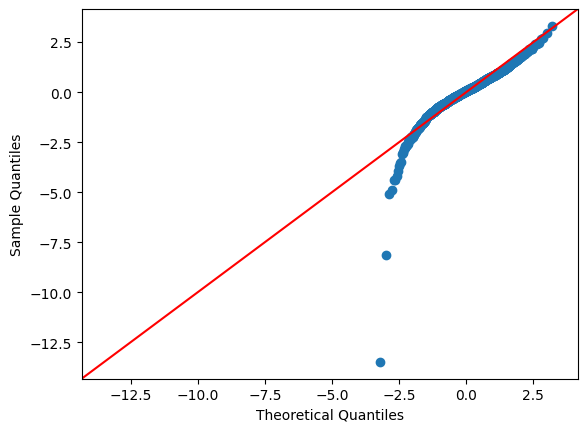

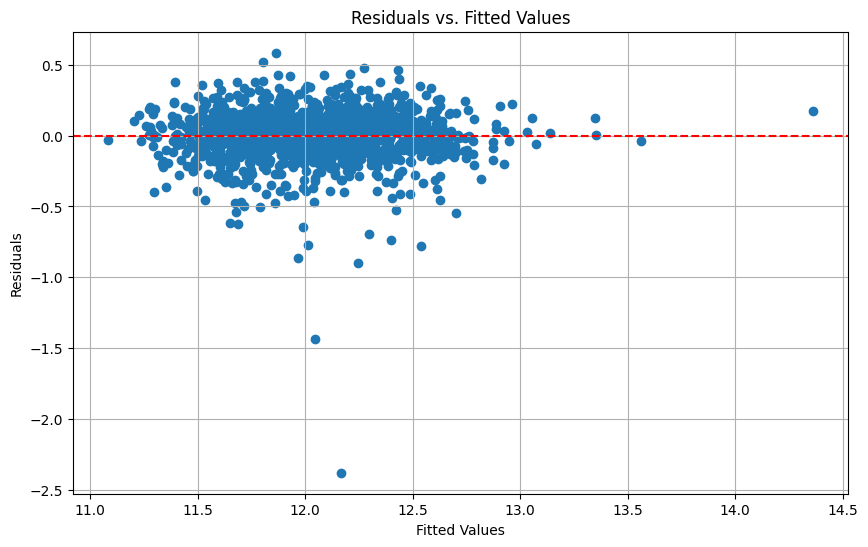

In [75]:
# Calculate residuals
residuals = logreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(logreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

<h3 style='color:skyblue'><strong>6.) Square Root Model</strong></h3>


In [76]:
# Square Root transformed regression
X = house_dat_num[['GarageCars', 'TotalBsmtSF', '2ndFlrSF', 'YearRemodAdd', '1stFlrSF', 'YearBuilt', 'Fireplaces', 'BedroomAbvGr', 'WoodDeckSF', 'ScreenPorch', 'TotRmsAbvGrd', 'LotArea']]
X = sm.add_constant(X)
sqrty = np.sqrt(y)
sqrtreg = sm.OLS(sqrty, X).fit()

# Display regression summary
print(sqrtreg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     481.7
Date:                Wed, 18 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:30:51   Log-Likelihood:                -7396.5
No. Observations:                1460   AIC:                         1.482e+04
Df Residuals:                    1447   BIC:                         1.489e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2142.6890    116.548    -18.385   

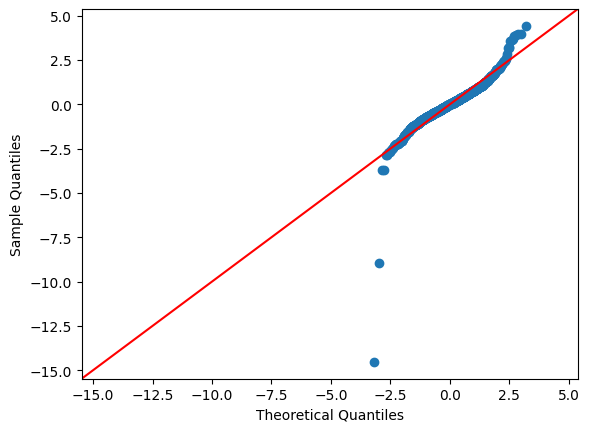

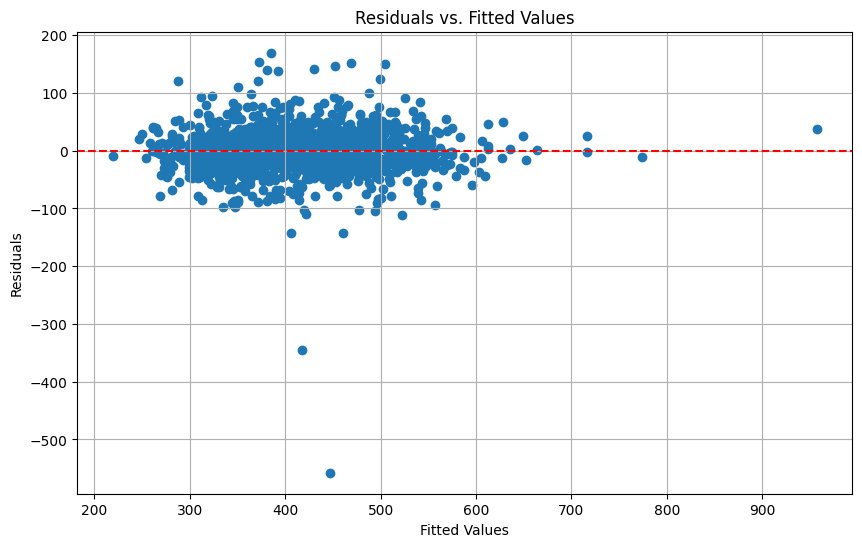

In [77]:
# Calculate residuals
residuals = sqrtreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(sqrtreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

<h3 style='color:skyblue'><strong>7.) Add Back Categorical Values Using Dummy Variables</strong></h3>
<h3 style='color:skyblue'><strong>Categorical - Log Model</strong></h3>



In [78]:
# log transformed regression including categorical variables
X = house_dat[['LotConfig', 'BldgType', 'Foundation', 'CentralAir', 'KitchenQual', 'PavedDrive', 'GarageCars', 'TotalBsmtSF', '2ndFlrSF', 'YearRemodAdd', '1stFlrSF', 'YearBuilt', 'Fireplaces', 'BedroomAbvGr', 'WoodDeckSF', 'ScreenPorch', 'TotRmsAbvGrd', 'LotArea']]
X = pd.get_dummies(X, columns=['LotConfig', 'BldgType', 'Foundation', 'CentralAir', 'KitchenQual', 'PavedDrive'], drop_first=True, dtype='float')
X = sm.add_constant(X)
logy = np.log(y)
logreg2 = sm.OLS(logy, X).fit()

# Display regression summary
print(logreg2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     230.0
Date:                Wed, 18 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:30:51   Log-Likelihood:                 575.72
No. Observations:                1460   AIC:                            -1087.
Df Residuals:                    1428   BIC:                            -918.3
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.7405      0.71

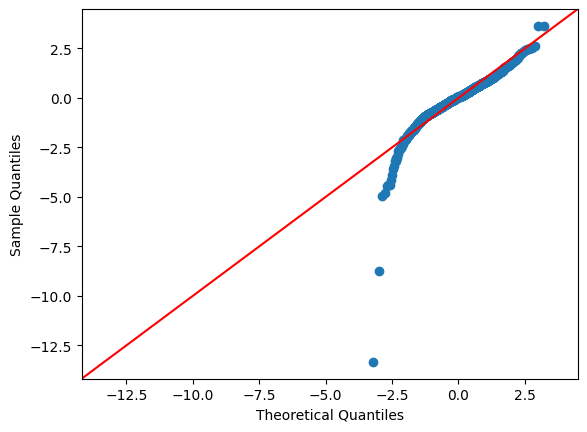

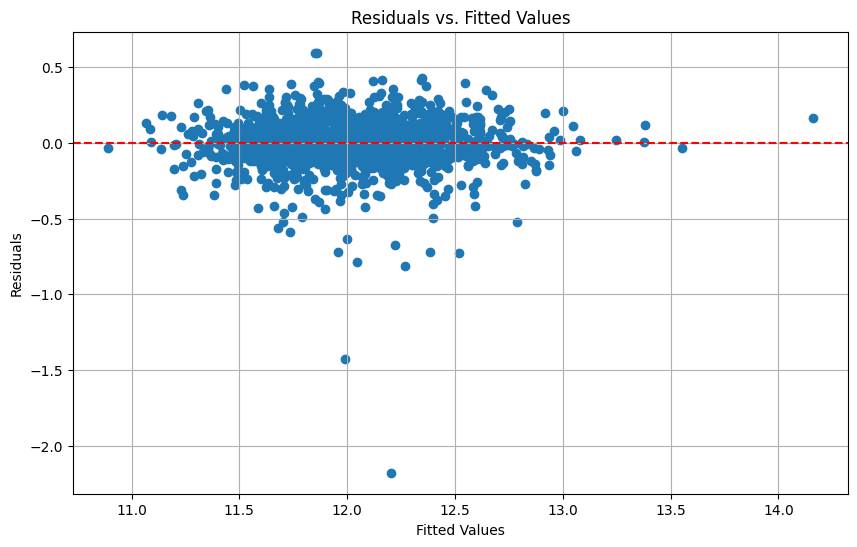

In [79]:
# Calculate residuals
residuals = logreg2.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(logreg2.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

<h3 style='color:skyblue'><strong>8.) Categorical - Square Root Model</strong></h3>


In [80]:
# square root transformed regression including categorical variables
X = house_dat[['LotConfig', 'BldgType', 'Foundation', 'CentralAir', 'KitchenQual', 'PavedDrive', 'GarageCars', 'TotalBsmtSF', '2ndFlrSF', 'YearRemodAdd', '1stFlrSF', 'YearBuilt', 'Fireplaces', 'BedroomAbvGr', 'WoodDeckSF', 'ScreenPorch', 'TotRmsAbvGrd', 'LotArea']]
X = pd.get_dummies(X, columns=['LotConfig', 'BldgType', 'Foundation', 'CentralAir', 'KitchenQual', 'PavedDrive'], drop_first=True, dtype='float')
X = sm.add_constant(X)
sqrty = np.sqrt(y)
sqrtreg2 = sm.OLS(sqrty, X).fit()

# Display regression summary
print(sqrtreg2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     227.7
Date:                Wed, 18 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:30:51   Log-Likelihood:                -7269.5
No. Observations:                1460   AIC:                         1.460e+04
Df Residuals:                    1428   BIC:                         1.477e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1360.3781    153.83

<h3 style='color:skyblue'><strong>9.) Fit Final Model</strong></h3>

<h5 style='color:skyblue'>The log regresssion with categorical variables had the best adjusted R-squared BUT there are insignificant p-values so we remove those and rerun the model</h5>

In [81]:
# remove insignificant variables
# after testing - Foundation, LotConfig, and BldgType need to be removed
X = house_dat[['CentralAir', 'KitchenQual', 'PavedDrive', 'GarageCars', 'TotalBsmtSF', '2ndFlrSF', 'YearRemodAdd', '1stFlrSF', 'YearBuilt', 'Fireplaces', 'WoodDeckSF', 'ScreenPorch', 'TotRmsAbvGrd', 'LotArea']]
X = pd.get_dummies(X, columns=['CentralAir', 'KitchenQual', 'PavedDrive'], drop_first=True, dtype='float')
X = sm.add_constant(X)
logy = np.log(y)
logreg3 = sm.OLS(logy, X).fit()

# Display regression summary
print(logreg3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     398.1
Date:                Wed, 18 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:30:51   Log-Likelihood:                 538.33
No. Observations:                1460   AIC:                            -1041.
Df Residuals:                    1442   BIC:                            -945.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.4704      0.631      3.

<h3 style='color:skyblue'><strong>The Adj R-Squared dropped slightly, but now only significant values remain</strong></h3>


In [82]:
#check for multicollinearity (VIF)
vifresstep = pd.DataFrame()
vifresstep["Variable"] = X.columns
vifresstep["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifresstep)

          Variable           VIF
0            const  20477.623488
1       GarageCars      1.868620
2      TotalBsmtSF      3.461347
3         2ndFlrSF      3.232445
4     YearRemodAdd      2.129158
5         1stFlrSF      5.220392
6        YearBuilt      2.362614
7       Fireplaces      1.461496
8       WoodDeckSF      1.151751
9      ScreenPorch      1.070559
10    TotRmsAbvGrd      3.292357
11         LotArea      1.173005
12    CentralAir_Y      1.338654
13  KitchenQual_Fa      1.840758
14  KitchenQual_Gd      4.647407
15  KitchenQual_TA      6.310428
16    PavedDrive_P      1.347566
17    PavedDrive_Y      1.729944


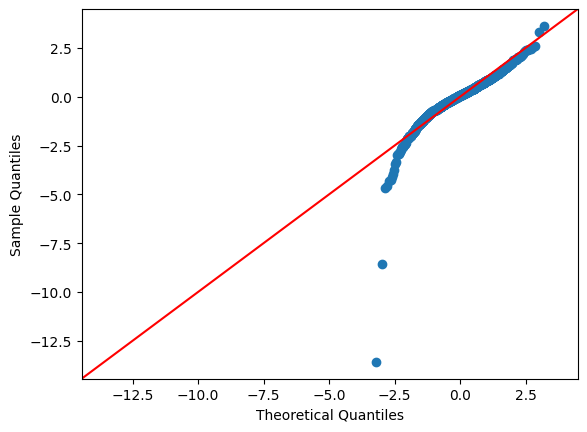

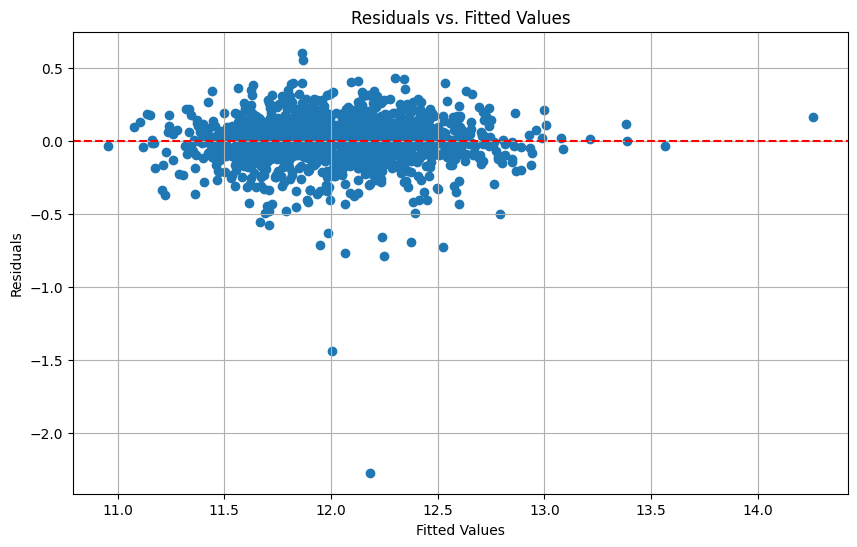

In [83]:
# Calculate residuals
residuals = logreg3.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(logreg3.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

<h3 style='color:skyblue'><strong>Now that our model is set, let's predict the sale prices</strong></h3>


In [84]:
data_path = 'homesforsale.csv'
homes_p = pd.read_csv(data_path)

# preview data
homes_p.head
print(homes_p)

     Id  LotArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  FullBath  HalfBath  \
0  11_1     8450            0       856       854         2         1   
1  11_2     9600         1262      1262         0         2         0   
2  11_3    11250          920       920       866         2         1   
3  11_4    11899         1175      1200      1142         3         1   
4  11_5    10791            0      1296         0         2         0   

   BedroomAbvGr  TotRmsAbvGrd  Fireplaces  ...  PoolArea  LotConfig  BldgType  \
0             3             8           0  ...         0     Inside      1Fam   
1             3             6           1  ...         0        FR2      1Fam   
2             3             6           1  ...         0     Inside      1Fam   
3             4            12           2  ...         0    CulDSac      1Fam   
4             2             6           0  ...         0     Inside    Duplex   

   YearBuilt  YearRemodAdd  Foundation  CentralAir KitchenQual PavedDrive 

<h5 style='color:skyblue'><strong>Since the prediction homes do not use all possibilities of the categorical variables, we need to create fixed categories for the dummy variables to generate correcly
</strong></h5>


In [85]:
#subset to only the variables we need for the model
homes_p = homes_p[['CentralAir', 'KitchenQual', 'PavedDrive', 'GarageCars', 'TotalBsmtSF', '2ndFlrSF', 'YearRemodAdd', '1stFlrSF', 'YearBuilt', 'Fireplaces', 'WoodDeckSF', 'ScreenPorch', 'TotRmsAbvGrd', 'LotArea']]

#all possible categories for the categorical variables
CentralAirCategories = ['N', 'Y']
KitchenQualCategories = ['Ex', 'Fa', 'Gd', 'TA']
PavedDriveCategories = ['N', 'P', 'Y']

#assign categories to the categorical variables
homes_p['CentralAir'] = pd.Categorical(homes_p['CentralAir'], categories=CentralAirCategories)
homes_p['KitchenQual'] = pd.Categorical(homes_p['KitchenQual'], categories=KitchenQualCategories)
homes_p['PavedDrive'] = pd.Categorical(homes_p['PavedDrive'], categories=PavedDriveCategories)

#now we can generate the dummy variables
homes_p_dummy = pd.get_dummies(homes_p, columns=['CentralAir', 'KitchenQual', 'PavedDrive'], drop_first=True, dtype='float')

#force add constant to match the dimensions of the model
homes_p_dummy = sm.add_constant(homes_p_dummy, has_constant='add')
print(homes_p_dummy.head())
print(homes_p_dummy.shape)

   const  GarageCars  TotalBsmtSF  2ndFlrSF  YearRemodAdd  1stFlrSF  \
0    1.0           2            0       854          2003       856   
1    1.0           2         1262         0          1976      1262   
2    1.0           2          920       866          2002       920   
3    1.0           3         1175      1142          2006      1200   
4    1.0           2            0         0          1967      1296   

   YearBuilt  Fireplaces  WoodDeckSF  ScreenPorch  TotRmsAbvGrd  LotArea  \
0       2003           0           0            0             8     8450   
1       1976           1         298            0             6     9600   
2       2001           1           0            0             6    11250   
3       2005           2         147            0            12    11899   
4       1967           0           0            0             6    10791   

   CentralAir_Y  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  PavedDrive_P  \
0           1.0             1.0    

<h3 style='color:skyblue'><strong>10.) Prediction</strong></h3>


In [86]:
# Predict the sale prices
predicted_log_prices = logreg3.predict(homes_p_dummy)
# Display the predicted log prices
print(predicted_log_prices)

0    11.972041
1    12.005585
2    12.249348
3    12.804927
4    11.697976
dtype: float64


In [87]:
# Convert the predicted log prices to actual prices
predicted_prices = np.exp(predicted_log_prices)
print(predicted_prices)

0    158267.341647
1    163666.258670
2    208845.137669
3    364006.635777
4    120327.865077
dtype: float64


<h3 style='color:skyblue'><strong>11.) Business Insights (Odds Ratios)</strong></h3>


In [88]:
model_coef = logreg3.params
model_coef = np.exp(model_coef)
print(model_coef)

const             11.826620
GarageCars         1.095554
TotalBsmtSF        1.000132
2ndFlrSF           1.000231
YearRemodAdd       1.002455
1stFlrSF           1.000213
YearBuilt          1.001967
Fireplaces         1.068940
WoodDeckSF         1.000150
ScreenPorch        1.000366
TotRmsAbvGrd       1.011830
LotArea            1.000002
CentralAir_Y       1.142381
KitchenQual_Fa     0.797576
KitchenQual_Gd     0.879066
KitchenQual_TA     0.803589
PavedDrive_P       1.088492
PavedDrive_Y       1.074786
dtype: float64


<h3 style='color:skyblue'><strong>12.) Slide Deck Visualizations</strong></h3>


C:\Users\wpswe\AppData\Local\Temp\ipykernel_32344\962425953.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_coef_sorted.values, y=model_coef_sorted.index, palette='colorblind')


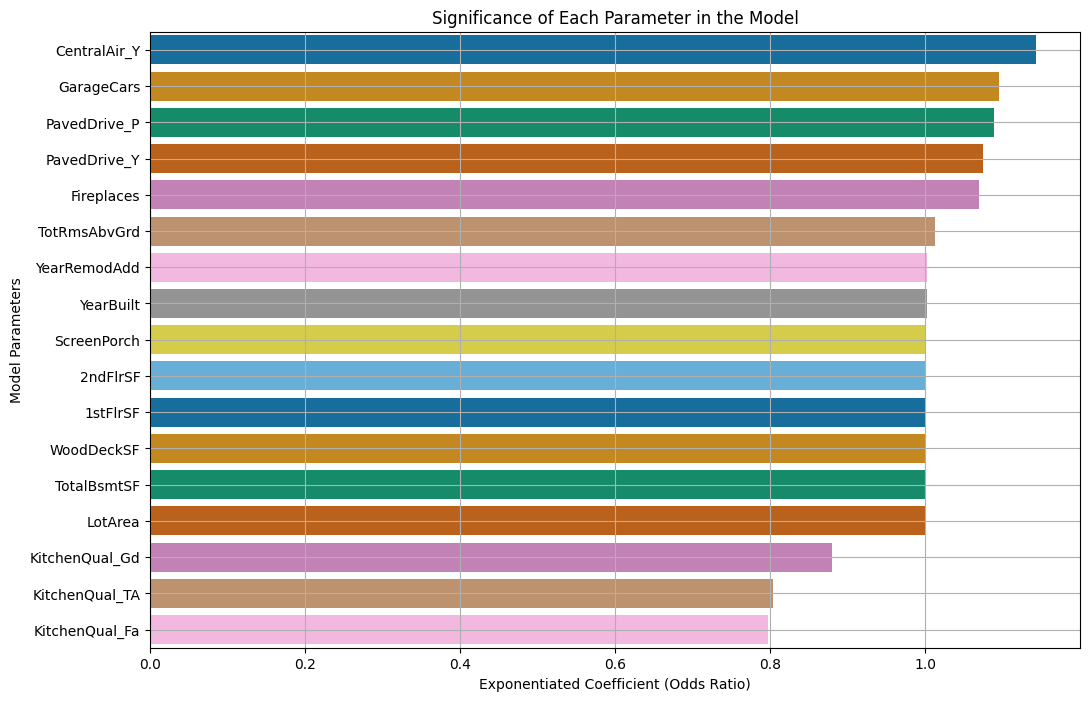

In [89]:
# Create a bar plot to visualize the significance of each parameter in model_coef
plt.figure(figsize=(12, 8))
model_coef_sorted = model_coef.drop('const').sort_values(ascending=False)
sns.barplot(x=model_coef_sorted.values, y=model_coef_sorted.index, palette='colorblind')
plt.xlabel('Exponentiated Coefficient (Odds Ratio)')
plt.ylabel('Model Parameters')
plt.title('Significance of Each Parameter in the Model')
plt.grid(True)
plt.show()